In [1]:
%pylab inline
from requests import post
from app.analysis import Quote
def screen_funds(*filter, min_assets=1, max_expense=1):
    query = 'query screen($filter:[String!]!,$limit:[FundLimitOptionInput!]!){viewer{screenFunds(filterCategory:$filter,limit:$limit,sort:{type:FUND_TOTAL_ASSETS,direction:DESC},first:100){edges{node{symbol}}}}}'
    variables = {'filter':filter,'limit':[{'type':'FUND_TOTAL_ASSETS','min':min_assets*1000000000,'inclusive':True},{'type':'FUND_NET_EXPENSE_RATIO','max':max_expense,'inclusive':True}]}
    r = post('https://lens.m1finance.com/graphql', json={'query': query, 'variables': variables}).json()
    return [n['node']['symbol'] for n in r['data']['viewer']['screenFunds']['edges']]

Populating the interactive namespace from numpy and matplotlib


In [2]:
bonds = screen_funds('Bonds', 'Leveraged Debt', min_assets=.01, max_expense=1.2)
equities = screen_funds('Equities', 'Leveraged Equity', min_assets=.01, max_expense=1.2)
print(len(bonds), len(equities))
quote = Quote(bonds + equities, 40, 5)
print(f'from {quote.start.date()} to {quote.end.date()} - {len(quote.data.columns)}')

4 54
from 2019-06-04 to 2019-07-12 - 58


In [3]:
stats = quote.statistics()
stats = stats[stats['shrp'] > 0]
print(len(stats))
stats.sort_values('mean', ascending=False).head(20)

56


,len,mean,std,shrp,yield,drawdown
Symbols,,,,,,
JNUG,23,9.013416,13.797748,0.650377,45.080461,18.740160
NUGT,23,8.792804,11.874340,0.737146,50.486617,17.417822
BRZU,23,6.740331,8.408545,0.796886,30.365608,7.626808
GDXX,23,5.859894,7.741039,0.751864,32.668583,12.050224
RUSL,23,4.846723,4.354583,1.103904,25.345369,3.627551
TQQQ,23,4.815119,4.877548,0.979065,34.769772,5.578252
SOXL,23,4.679422,8.376961,0.553869,34.122773,14.554020
TECL,23,4.588611,5.118964,0.888642,37.250939,6.350867
LBJ,23,4.428857,6.024406,0.728565,19.860219,7.729469


{'FINU': 0.344, 'GDXX': 0.289, 'RETL': 0.367} 3.54


,count,mean,std,min,25%,50%,75%,max,shrp,yield,drawdown
Portfolio,23.0,3.467486,1.946410,-0.208317,2.227124,3.013915,4.746061,6.948420,1.761091,19.928749,2.314421
GDXX,23.0,5.859894,7.741039,-12.050224,1.205712,3.767220,9.030639,23.535703,0.751864,32.668583,12.050224
RETL,23.0,2.630043,3.831301,-5.607086,0.477419,2.807313,5.327277,10.865468,0.676105,12.520034,6.700593
FINU,23.0,2.561947,4.113930,-4.314635,-0.144439,1.450878,4.192359,11.531237,0.613103,17.129873,4.314635


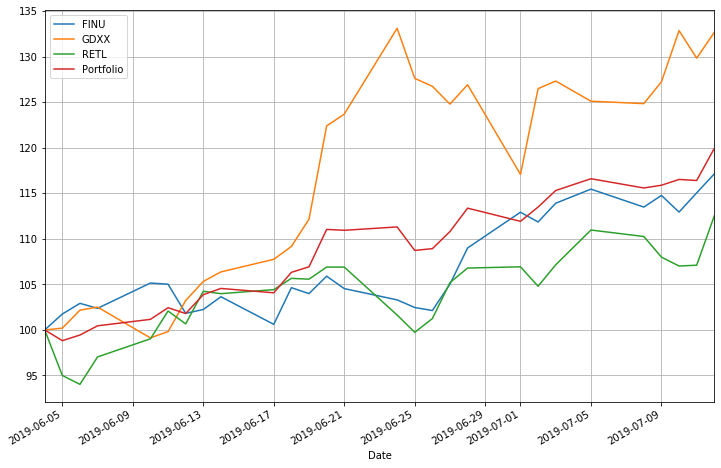

In [7]:
quote.setup_mask(['FINU', 'GDXX', 'RETL'])
ratio, mean, *_ = quote.find_optimal_ratio()
print(ratio, mean)
quote.graph(ratio)

evicted SAA 0.747 -0.386
evicted JPNL 0.732 -0.101
evicted XPP 0.751 -0.008
evicted DFEN 0.719 -0.287
evicted UCC 0.744 -0.361
evicted UYM 0.573 -0.474
evicted RUSL 0.609 -0.247
evicted LABU 0.630 -0.143
evicted TMF 0.249 -0.384
evicted DIG 0.565 -0.292
evicted BRZU 0.361 -0.114
evicted USD 0.449 -0.163
retry backlogs ['EDC', 'UXI', 'URE', 'EET', 'UMDD', 'TYD', 'CURE', 'RXL', 'UDOW', 'DDM', 'PPLC', 'MIDU', 'MVV', 'TQQQ', 'TECL', 'DZK', 'EURL', 'QLD', 'UST', 'NUGT', 'UBT', 'UWM', 'UPRO', 'SSO', 'ROM', 'UBIO', 'SPXL', 'JNUG', 'ERX', 'YINN', 'DRN', 'URTY', 'TNA', 'FAS', 'LBJ', 'UYG', 'CHAU', 'SOXL', 'BIB', 'UPW', 'GUSH'] at 0.805/-0.51 - 1.812
evicted TNA 0.796 -0.350
evicted URE 0.581 -0.406
evicted TECL 0.586 -0.017
evicted CHAU 0.673 0.121
evicted UBIO 0.732 -0.062
evicted UST 0.377 -0.246
evicted LBJ 0.603 -0.180
evicted ERX 0.569 -0.271
evicted SOXL 0.504 -0.198
retry backlogs ['UXI', 'UDOW', 'DDM', 'EURL', 'BIB', 'JNUG', 'EDC', 'CURE', 'ROM', 'UPRO', 'FAS', 'URTY', 'QLD', 'EET', 'UY

,count,mean,std,min,25%,50%,75%,max,shrp,yield,drawdown
Portfolio,23.0,3.444156,1.925945,-0.232686,2.148262,3.013096,4.733555,6.801687,1.767689,19.798870,2.291948
GDXX,23.0,5.859894,7.741039,-12.050224,1.205712,3.767220,9.030639,23.535703,0.751864,32.668583,12.050224
RETL,23.0,2.630043,3.831301,-5.607086,0.477419,2.807313,5.327277,10.865468,0.676105,12.520034,6.700593
FINU,23.0,2.561947,4.113930,-4.314635,-0.144439,1.450878,4.192359,11.531237,0.613103,17.129873,4.314635


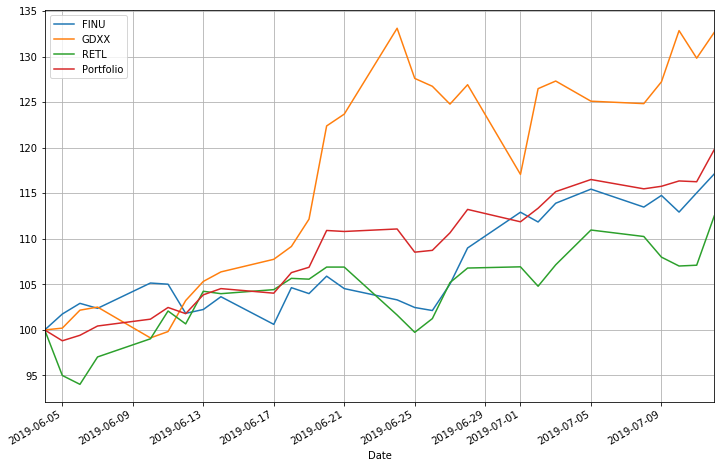

In [8]:
bounds = 3, 4
quote.setup_mask(stats.index)
sd = quote.optimize_portfolio(backlogs_pos_threshold=.8, _lambda=-1, bounds=bounds)
quote.setup_mask(['FINU', 'GDXX', 'RETL'])
sd.update(quote.optimize_portfolio(_lambda=-1, bounds=bounds))
quote.setup_mask({e for r in sd.values() for e in r})
sd.update(quote.optimize_portfolio(_lambda=-1, bounds=bounds))
for e in sd:
    print(e, sd[e])
_, ratio = sd.peekitem()
quote.setup_mask(ratio)
quote.graph(ratio)